## Income Inequality between high earners and low earners

A critique of http://www.informationisbeautiful.net/visualizations/what-are-wallst-protestors-angry-about/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(palette = sns.dark_palette("skyblue", 8, reverse=True))

/usr/local/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##Getting the data

Before in going into the purely visual aspects and how effective they are at conveying a story, I want to understand what data we are dealing with. At the bottom of the graph, there is a bit.ly URL that points to a google drive document. Adding export?format=xlsx will allow us to download this document as an excel spreadsheet, which can then be sliced and diced easily with the pandas analytics module.

In [2]:
!wget 'https://docs.google.com/spreadsheets/d/1N_Hc-xKr7DQc8bZAvLROGWr5Cr-A6MfGnH91fFW3ZwA/export?format=xlsx&id=1N_Hc-xKr7DQc8bZAvLROGWr5Cr-A6MfGnH91fFW3ZwA' -O wallstreet.xlsx

--2015-11-18 09:07:26--  https://docs.google.com/spreadsheets/d/1N_Hc-xKr7DQc8bZAvLROGWr5Cr-A6MfGnH91fFW3ZwA/export?format=xlsx&id=1N_Hc-xKr7DQc8bZAvLROGWr5Cr-A6MfGnH91fFW3ZwA
Resolving docs.google.com... 74.125.228.192, 74.125.228.199, 74.125.228.195, ...
Connecting to docs.google.com|74.125.228.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: “wallstreet.xlsx”

    [ <=>                                   ] 9,302       --.-K/s   in 0.002s  

2015-11-18 09:07:32 (4.93 MB/s) - “wallstreet.xlsx” saved [9302]



In [3]:
df = pd.read_excel('wallstreet.xlsx', skiprows=1, index_col = 'Country')

In [4]:
df.describe()

,Gini,Year,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,135.000000,135.000000,0,0,0
mean,39.993333,2005.607407,NaN,NaN,NaN
std,9.920762,3.919138,NaN,NaN,NaN
min,23.000000,1989.000000,NaN,NaN,NaN
25%,32.350000,2005.000000,NaN,NaN,NaN
50%,39.000000,2007.000000,NaN,NaN,NaN
75%,45.800000,2008.000000,NaN,NaN,NaN
max,70.700000,2010.000000,NaN,NaN,NaN


First issue with the data, right away we can see the wide range of dates. Let's look at the date distribution. We probably would want to use only 2010 if it represents enough data. We will make a note of <b>39.99</b> as the average Gini coefficient over all those years.

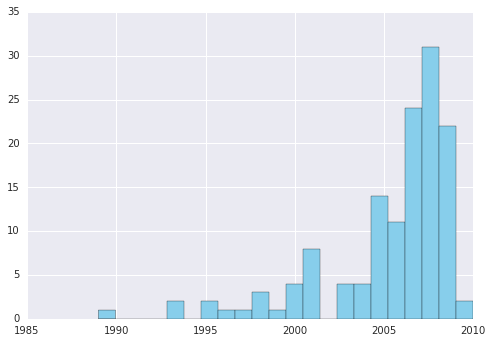

In [5]:
df['Year'].hist(bins=22)  # 22 bins so I get every year as a distinct sum

We will get just the data for 2009. Not only it is recent, but it is plenty of data points to represent at once. This will also address the other issue with the data: in the raw form, it is too numerous and will overload the reader if presented as is. We will also load the US data, since it is supposed to tell the story of <b>'occupy wallstreet'</b>. If we are missing further critical data, we can always add a specific data point later, as we are keeping the original data frame untouched.

In [6]:
gini_df = df[(df.Year==2009)|(df.index=='United States')]['Gini']  # Only 2009, and choose only the gini columns (and the index, country)

In [7]:
gini_df

Country
Hungary          24.7
Kazakhstan       26.7
Ireland          29.3
Estonia          31.4
Korea, South     31.4
Indonesia        36.8
Georgia          40.8
Venezuela        41.0
Russia           42.2
Uruguay          42.4
Uganda           44.3
United States    45.0
Argentina        45.8
Malaysia         46.2
Singapore        47.8
Peru             48.0
Costa Rica       50.3
Chile            52.1
Paraguay         53.2
Thailand         53.6
Brazil           53.9
Bolivia          58.2
Colombia         58.5
Name: Gini, dtype: float64

/usr/local/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


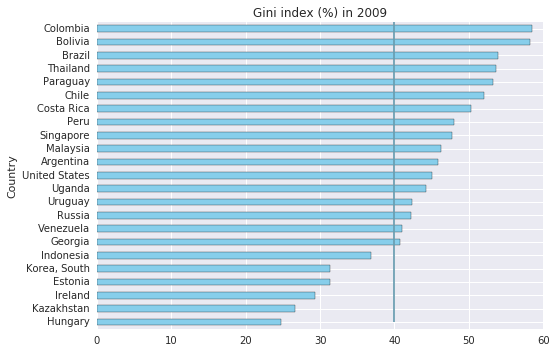

In [8]:
current_ax = gini_df.plot(kind='barh', color=sns.color_palette()[0])
current_ax.set_title('Gini index (%) in 2009')
current_ax.vlines(39.99, 0, len(gini_df), color=sns.color_palette()[2])

This is already way easier to compare than the original infographic. Perhaps not as snazzy, but at least it gives us a start in trying to understand the data. But it is just that, a start. One angle would be to investigate how much above average is the Gini for the US. But I would also want to have the measures, including the average from the same year. A quick comparison of the two distributions (2009 vs all the data) shows how sampling on 2009 skews toward a higher Gini.

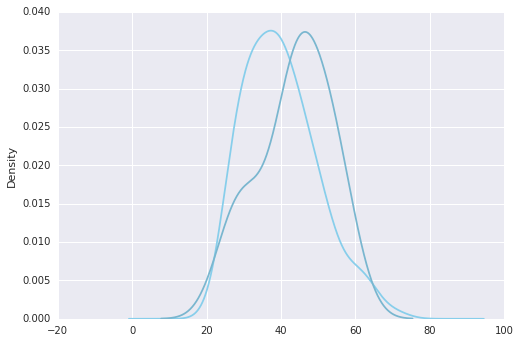

In [9]:
ax = df['Gini'].plot(kind='kde')
gini_df.plot(kind='kde', ax=ax)  #overlay 2009 vs all years/countries


Comparing with GDP, population, gender inequality, even subjective "satisfaction indexes" and the like would be much more interesting. To tell a real story, we need to show some correlation, and provide some narrative and/or visualization to explain Gini. At the end of the day, perhaps the real story is that Gini is not a great universal indicator.